# Loan Eligibility Prediction

In [65]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Loading the dataset

data = pd.read_csv("C:/Users/dell/Downloads/ipynb datasets/loan-train.csv")

In [3]:
#Data description

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.shape

(614, 13)

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#percentage of missing values in each row
(data.isnull().sum()/(len(data)))*100                 

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
#Data type of each column
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: >

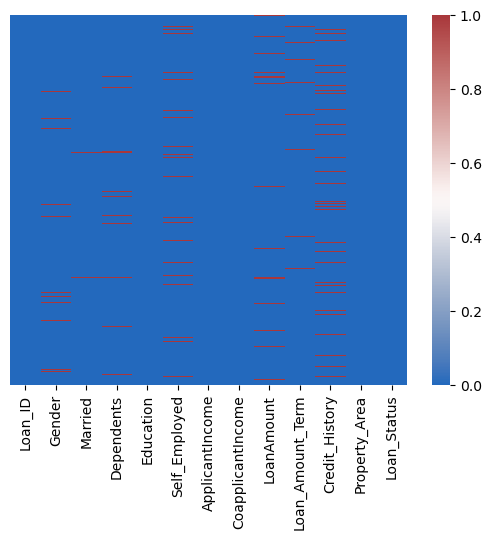

In [13]:
#Visualizing the null values
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")

In [14]:
data['Gender'].fillna(method='bfill' , inplace=True)
data['Married'].fillna(method='bfill' , inplace=True)
data['Dependents'].fillna(method='bfill' , inplace=True)

<Axes: >

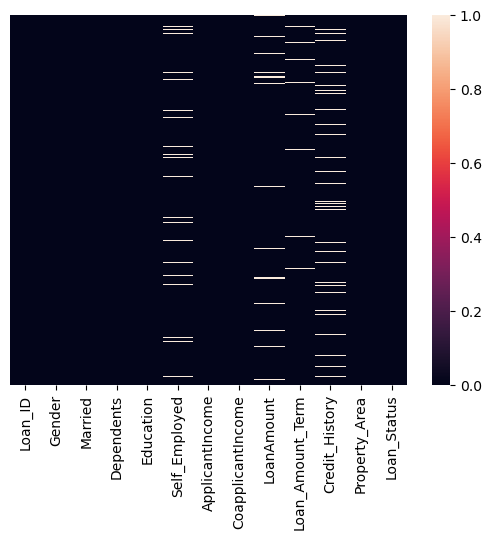

In [15]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='rocket')

In [16]:
data['Self_Employed'].fillna(method='ffill' , inplace=True)
data['Loan_Amount_Term'].fillna(method='ffill' , inplace=True)

<Axes: >

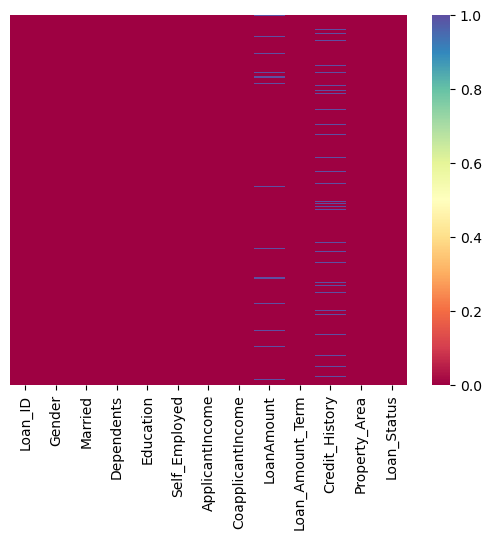

In [17]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="Spectral")

In [18]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

<Axes: >

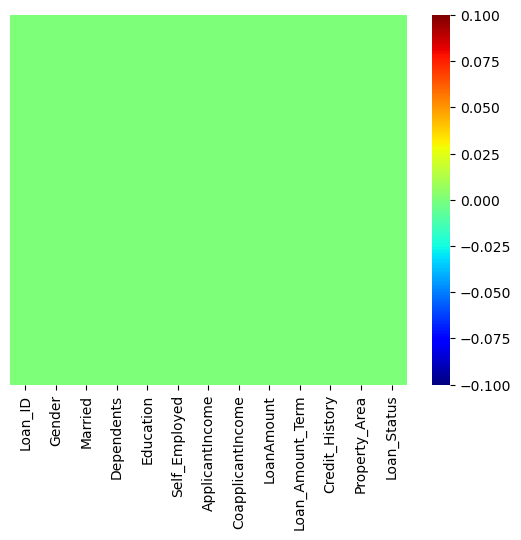

In [19]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='jet')

In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0.5, 1.0, 'Starting 10 ApplicantIncome with their LoanAmount')

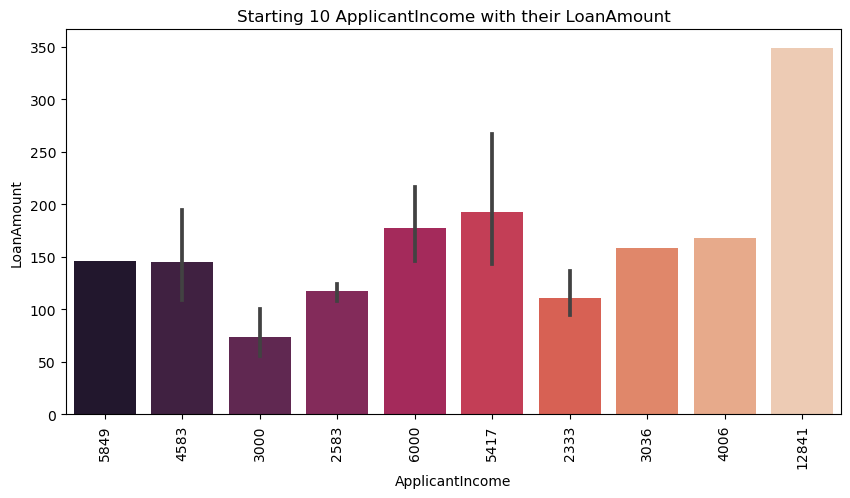

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(y="LoanAmount", x='ApplicantIncome', data=data, order=data['ApplicantIncome'].iloc[:10], palette='rocket')
plt.xticks(rotation=90)
plt.title('Starting 10 ApplicantIncome with their LoanAmount')

In [22]:
a = data.groupby('Dependents')['Dependents'].count()

<Axes: xlabel='Dependents'>

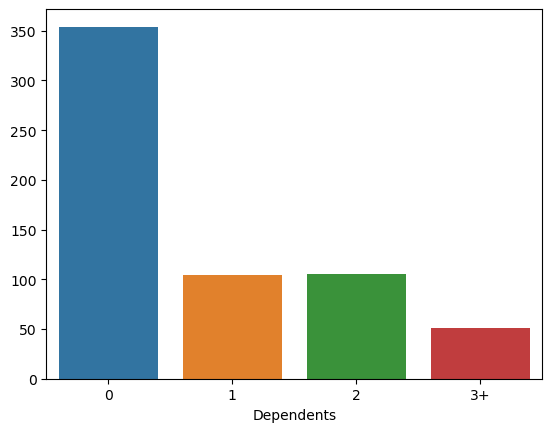

In [23]:
sns.barplot(x=a.index, y=a.values)

In [24]:
a = data.groupby('Gender')['Gender'].count()

([<matplotlib.patches.Wedge at 0x2154e09e010>,
 [Text(0.9212070345910167, 0.6011469033605893, 'Female'),
  Text(-0.9212070908744479, -0.6011468171109592, 'Male')],
 [Text(0.5024765643223726, 0.32789831092395777, '18.40%'),
  Text(-0.502476595022426, -0.32789826387870497, '81.60%')])

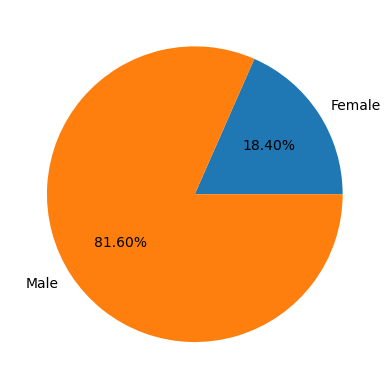

In [25]:
plt.pie(a, labels=a.index, autopct='%.2f%%')

In [26]:
a = data.groupby('Married')['Married'].count()

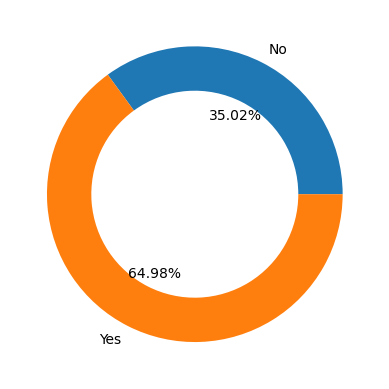

In [27]:
plt.pie(a, labels=a.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
plt.show()

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

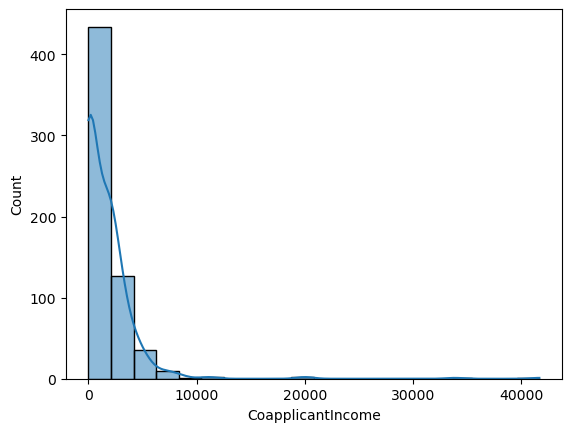

In [28]:
sns.histplot(data['CoapplicantIncome'], bins=20, kde=True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

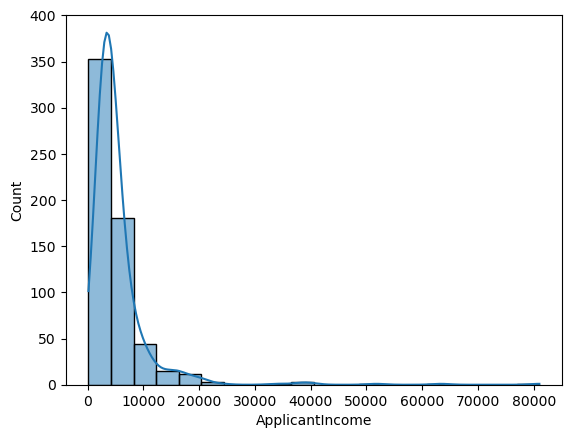

In [29]:
sns.histplot(data['ApplicantIncome'], bins=20, kde=True)

<Axes: xlabel='ApplicantIncome'>

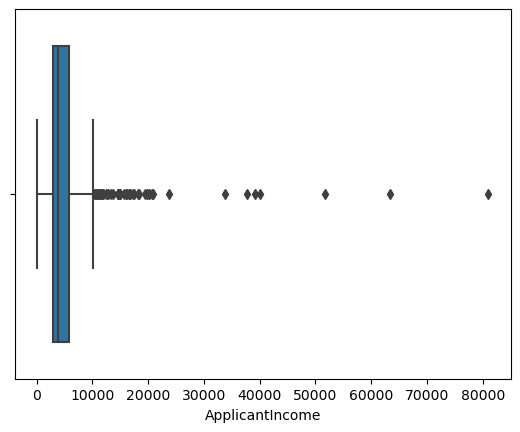

In [30]:
sns.boxplot(x = 'ApplicantIncome', data=data)

<Axes: xlabel='CoapplicantIncome'>

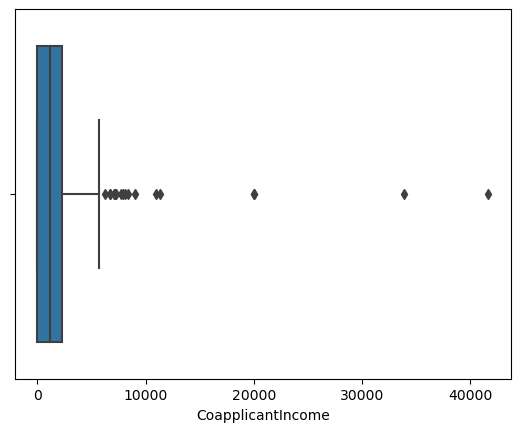

In [31]:
sns.boxplot(x = 'CoapplicantIncome', data=data)

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

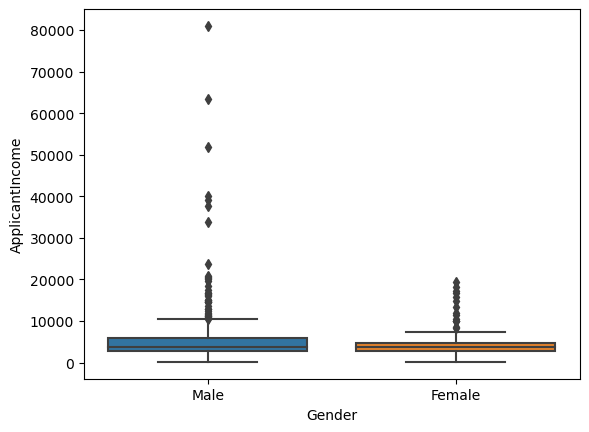

In [32]:
sns.boxplot(y="ApplicantIncome", x="Gender", data=data)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

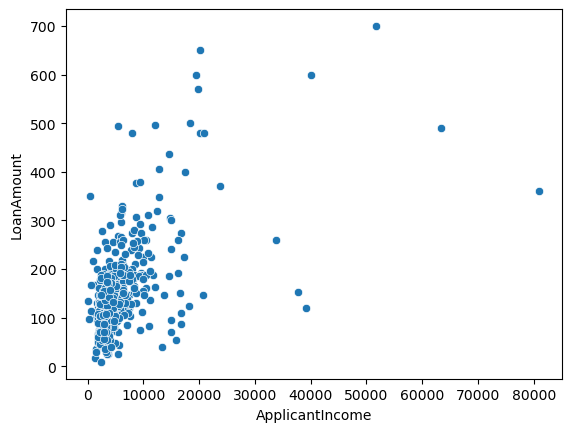

In [33]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=data)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

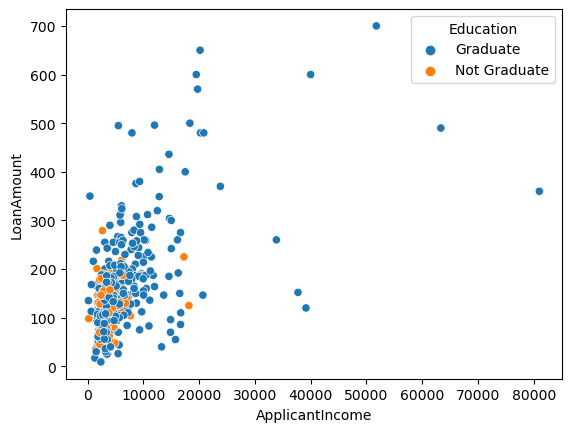

In [34]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue = 'Education', data=data)

<Axes: xlabel='Dependents', ylabel='count'>

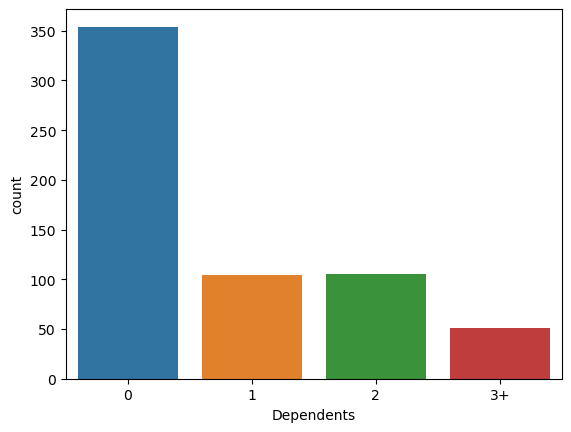

In [35]:
sns.countplot(x='Dependents', data=data)

<Axes: xlabel='Dependents', ylabel='count'>

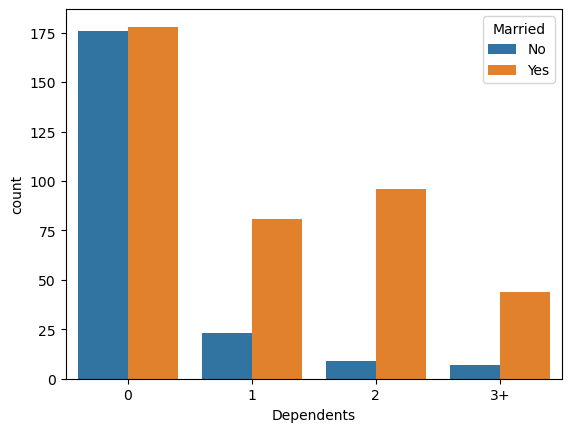

In [36]:
sns.countplot(x='Dependents', hue='Married', data=data)

<Axes: xlabel='Self_Employed', ylabel='count'>

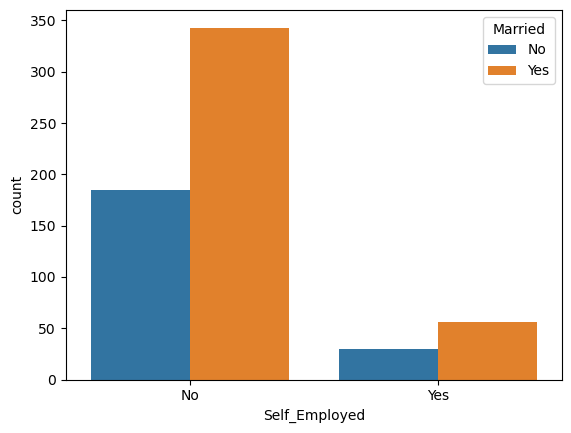

In [37]:
sns.countplot(x='Self_Employed', hue='Married', data=data)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

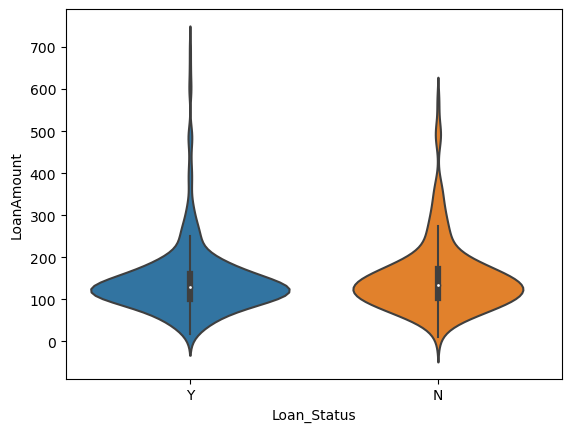

In [38]:
sns.violinplot(x='Loan_Status', y='LoanAmount', data=data)

<Axes: xlabel='Loan_Amount_Term'>

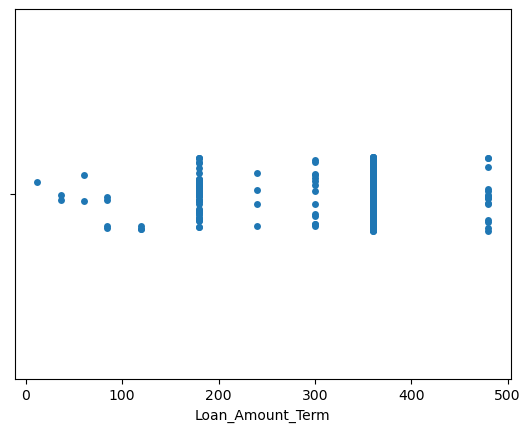

In [39]:
sns.stripplot(x='Loan_Amount_Term', data=data)

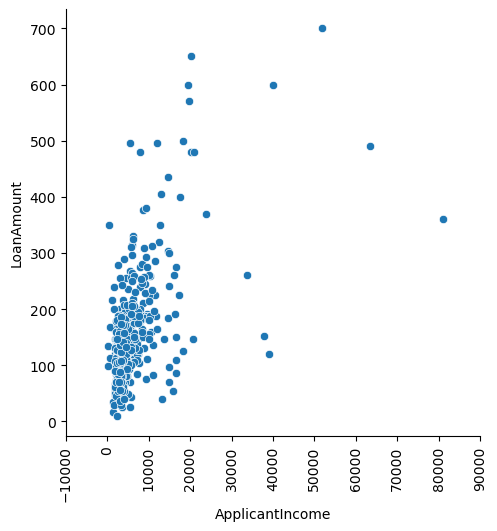

In [40]:
a = sns.relplot(x='ApplicantIncome', y='LoanAmount', data=data)
a.set_xticklabels(rotation=90)

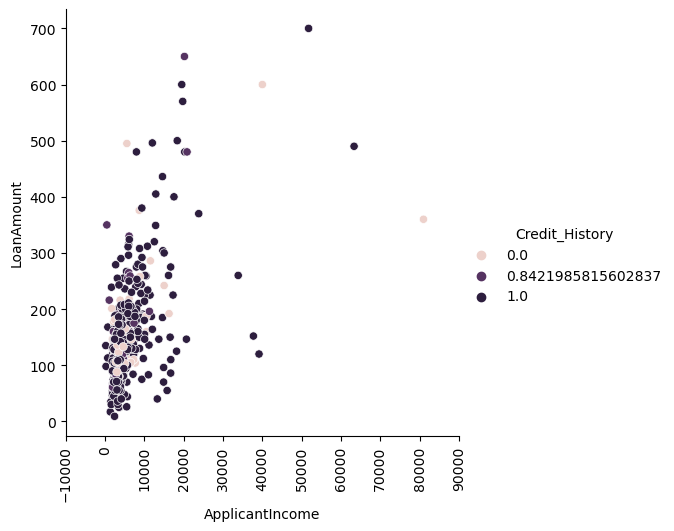

In [41]:
a = sns.relplot(x='ApplicantIncome', y='LoanAmount', hue='Credit_History', data=data)
a.set_xticklabels(rotation=90)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

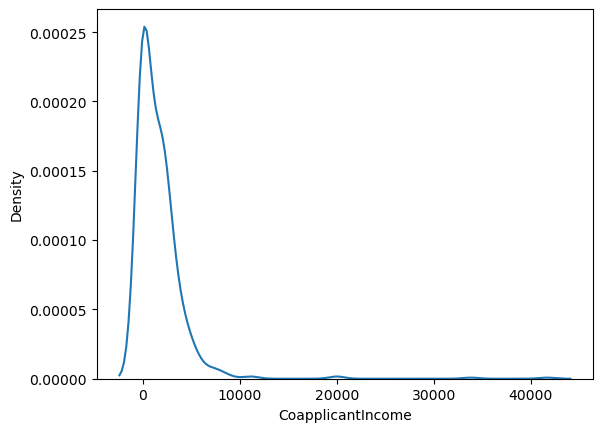

In [42]:
sns.kdeplot(x='CoapplicantIncome', data=data)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

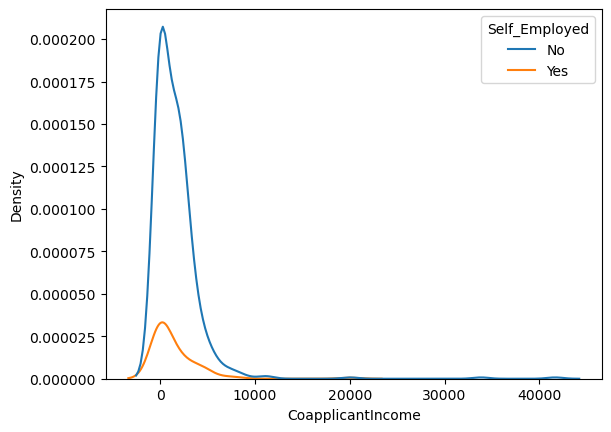

In [43]:
sns.kdeplot(x='CoapplicantIncome', hue='Self_Employed', data=data)

<Axes: xlabel='Loan_Amount_Term', ylabel='Proportion'>

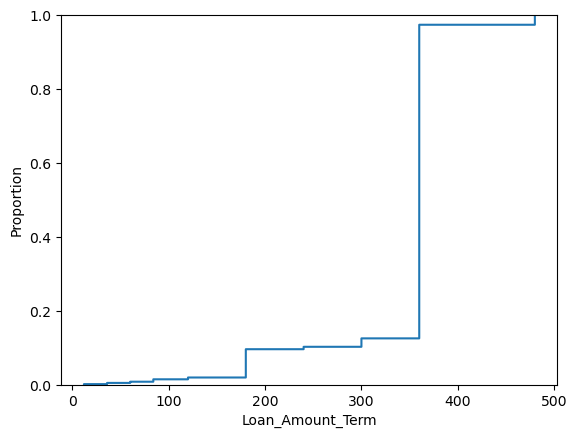

In [44]:
sns.ecdfplot(x='Loan_Amount_Term', data=data)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

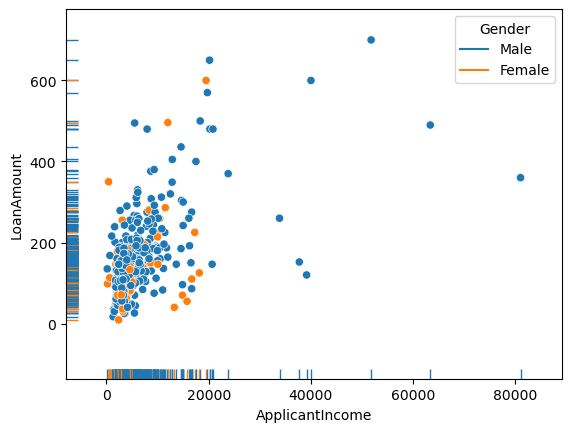

In [45]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Gender', data=data)
sns.rugplot(x='ApplicantIncome', y='LoanAmount', hue='Gender', data=data)

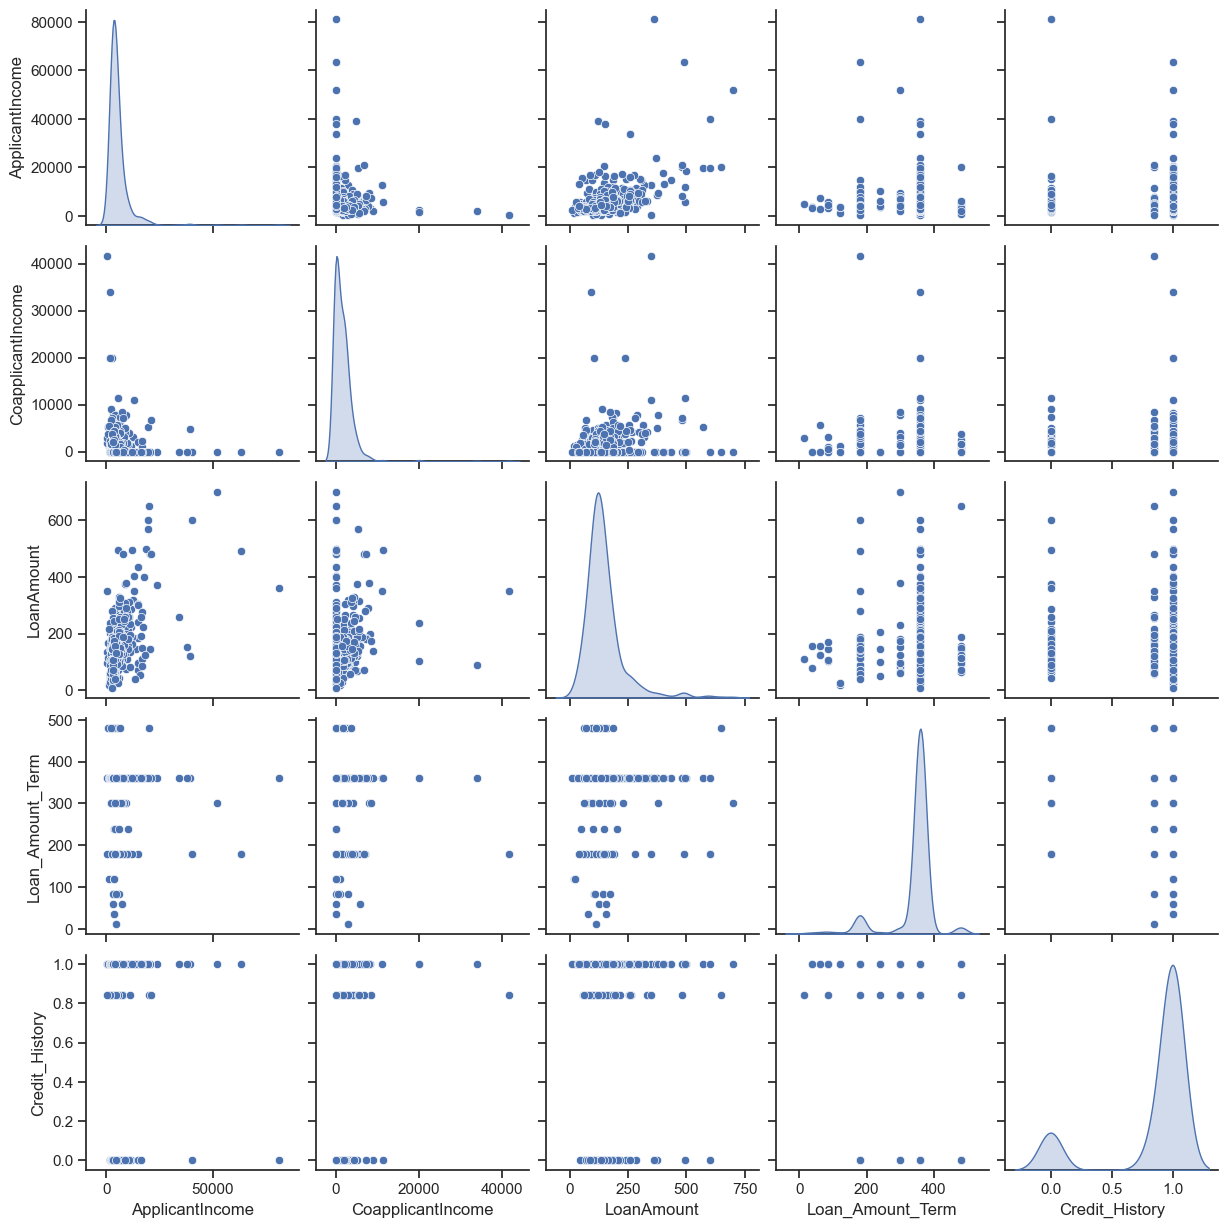

In [46]:
#Pair plot of data
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde", markers="o")

In [47]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [48]:
categorical_cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
encoder = OneHotEncoder(drop='first', sparse=False)
encoder_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

In [49]:
encoder_cols

,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001024,...,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [50]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
scaler = StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns = numerical_cols)

In [51]:
scaled_cols.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,0.000000,0.280037,0.45164
1,-0.134412,-0.038732,-0.219273,0.280037,0.45164
2,-0.393747,-0.554487,-0.957641,0.280037,0.45164
3,-0.462062,0.251980,-0.314547,0.280037,0.45164
4,0.097728,-0.554487,-0.064454,0.280037,0.45164


In [75]:
#Data Preproceessing

X = pd.concat([encoder_cols, scaled_cols], axis=1)
Y = data['Loan_Status']

In [76]:
#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
knn = KNeighborsClassifier(n_neighbors=10)

#Training the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [78]:
knn.score(X_test,Y_test)

0.7642276422764228

In [79]:
#Making prediction on test set
Y_pred= knn.predict(X_test)

In [80]:
#Accuracy of KNN model
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score : {:.2f}%". format(acc*100))

Accuracy Score : 76.42%


In [61]:
#Classification report of KNN model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           N       0.82      0.42      0.55        43
           Y       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



In [62]:
#Confusion Matrix of KNN model
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[18 25]
 [ 4 76]]
True Positives(TP) =  18
True Negatives(TN) =  76
False Positives(FP) =  25
False Negatives(FN) =  4


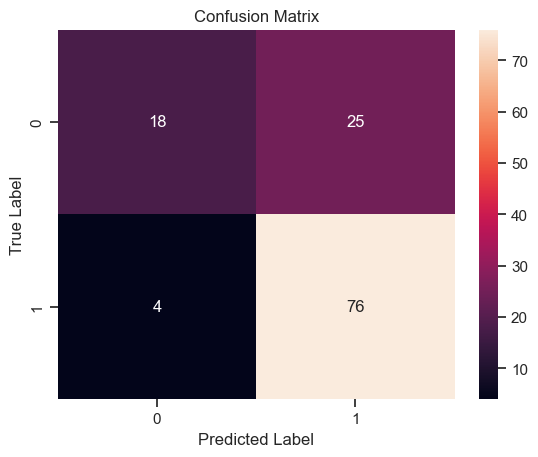

In [63]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Grid Search

In [81]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [82]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [83]:
best_param = grid_search.best_params_
best_knn = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'], weights = best_param['weights'],p=best_param['p'])
best_knn.fit(X_train, Y_train)
Y_pred = best_knn.predict(X_test)

In [84]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [85]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score after Grid Search : {:.2f}%". format(acc*100))

Accuracy Score after Grid Search : 78.05%


In [86]:
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [87]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[18 25]
 [ 2 78]]
True Positives(TP) =  18
True Negatives(TN) =  78
False Positives(FP) =  25
False Negatives(FN) =  2


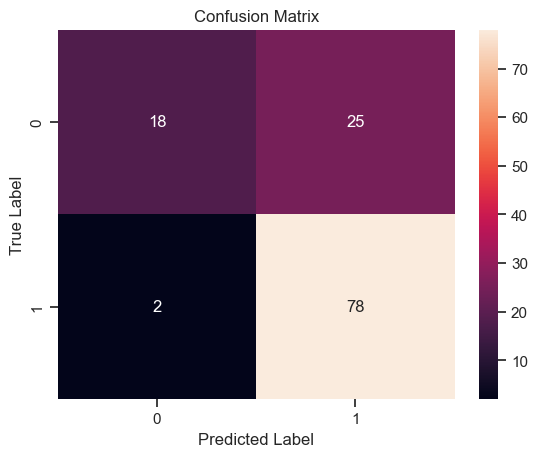

In [88]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Evaluating the best model using cross-validation

In [94]:
cross_val_scores = cross_val_score(best_knn, X, Y, cv=5, scoring='accuracy')
mean_accuracy = cross_val_scores.mean()
print("Cross-Validation Mean Accuracy : {:.2f}%". format(mean_accuracy*100))

Cross-Validation Mean Accuracy : 78.83%


# Choosing the right k

In [95]:
# Define a range of k values to explore
k_values = list(range(1, 21))  # Explore k values from 1 to 20

In [96]:
# Initialize lists to store mean accuracy for each k
mean_accuracies = []

In [97]:
# Iterate through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation with k neighbors
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

In [98]:
# Find the optimal k
optimal_k = k_values[mean_accuracies.index(max(mean_accuracies))]

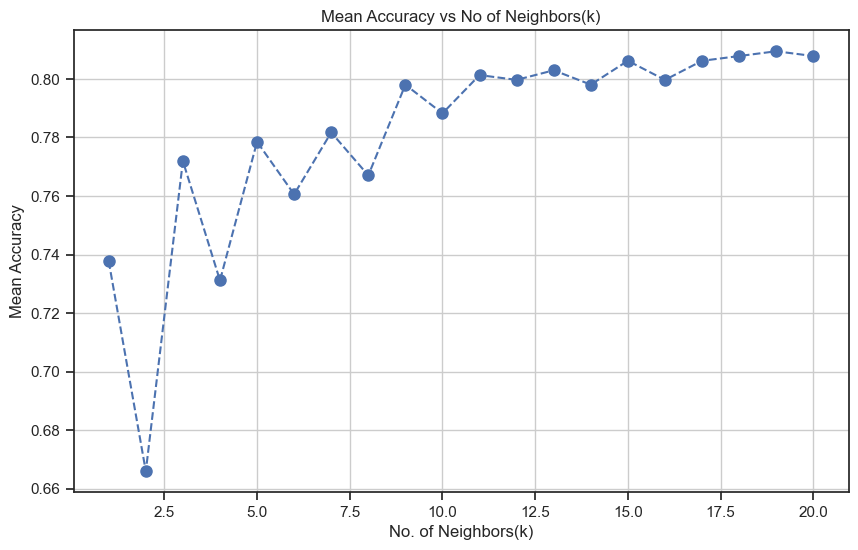

In [99]:
# Plot the mean accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='dashed', markersize=8)
plt.title("Mean Accuracy vs No of Neighbors(k)")
plt.xlabel("No. of Neighbors(k)")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.show()

In [100]:
#Print the optimal k
print("Optimal k : ", optimal_k)

Optimal k :  19


# Dimensional Reduction

In [101]:
from sklearn.decomposition import PCA

# Perform dimensionality reduction using PCA
pca = PCA(n_components=5)  # You can choose the number of components based on your dataset
X_reduced = pca.fit_transform(X)

In [102]:
# Split the reduced data into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

In [103]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [104]:
# Create the KNN classifier
knn = KNeighborsClassifier()

In [105]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [106]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [107]:
# Fit the model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=9, p=1)

In [108]:
# Make predictions on the test data
Y_pred = best_knn.predict(X_test)

In [110]:
# Evaluate the model
print("Best Hyperparameter : ", best_param)
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score after Dimensional Reduction : {:.2f}%". format(acc*100))

Best Hyperparameter :  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Accuracy Score after Dimensional Reduction : 73.98%


In [111]:
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           N       0.72      0.42      0.53        43
           Y       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123



In [112]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[18 25]
 [ 7 73]]
True Positives(TP) =  18
True Negatives(TN) =  73
False Positives(FP) =  25
False Negatives(FN) =  7


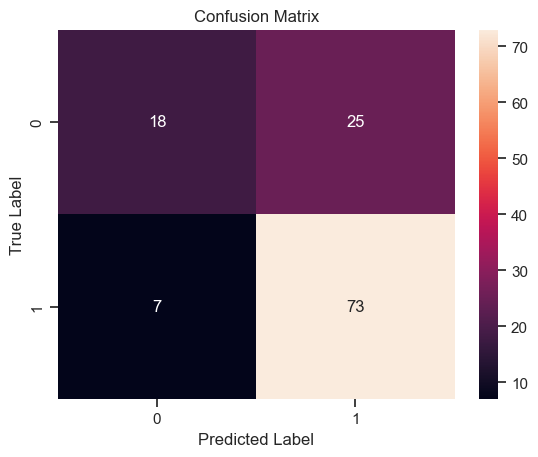

In [113]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Euclidean method

In [114]:
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [115]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [116]:
Y_pred = knn_classifier.predict(X_test)

In [117]:
accuracy = accuracy_score(Y_test, Y_pred)  # For classification
print("Accuracy Score after Euclidean Method : {:.2f}%". format(acc*100))

Accuracy Score after Euclidean Method : 73.98%


In [118]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           N       0.70      0.44      0.54        43
           Y       0.75      0.90      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.73      0.74      0.72       123



In [119]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[19 24]
 [ 8 72]]
True Positives(TP) =  19
True Negatives(TN) =  72
False Positives(FP) =  24
False Negatives(FN) =  8


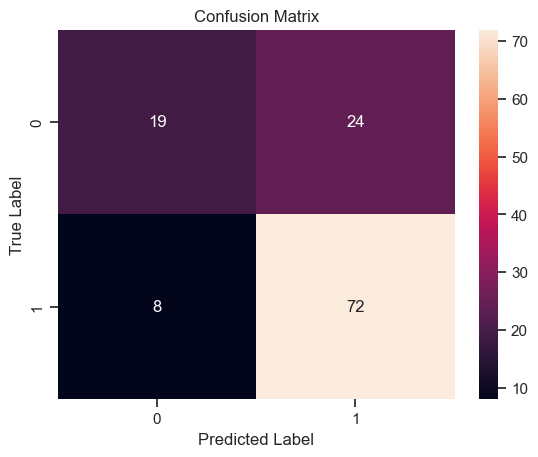

In [120]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Manhatan distance method

In [121]:
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

In [122]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [123]:
Y_pred = knn_classifier.predict(X_test)

In [124]:
accuracy = accuracy_score(Y_test, Y_pred) 
print("Accuracy Score after Manhatan Distance Method : {:.2f}%". format(acc*100))

Accuracy Score after Manhatan Distance Method : 73.98%


In [125]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           N       0.70      0.44      0.54        43
           Y       0.75      0.90      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.73      0.74      0.72       123



In [126]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[19 24]
 [ 8 72]]
True Positives(TP) =  19
True Negatives(TN) =  72
False Positives(FP) =  24
False Negatives(FN) =  8


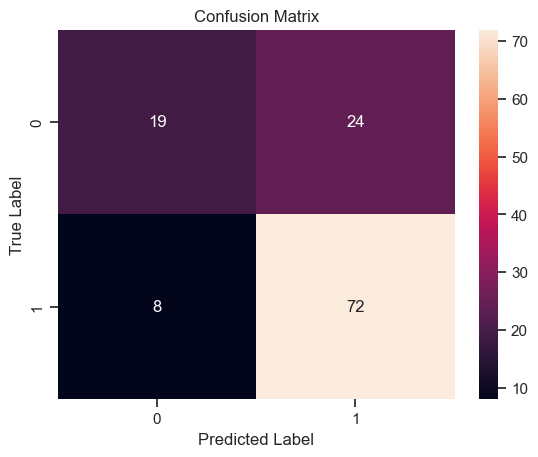

In [127]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Minkowsky distance method

In [128]:
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)

In [129]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [130]:
Y_pred = knn_classifier.predict(X_test)

In [131]:
accuracy = accuracy_score(Y_test, Y_pred)  
print("Accuracy Score after Minkowsky Distance Method : {:.2f}%". format(acc*100))

Accuracy Score after Minkowsky Distance Method : 73.98%


In [132]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           N       0.70      0.44      0.54        43
           Y       0.75      0.90      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.73      0.74      0.72       123



In [133]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[19 24]
 [ 8 72]]
True Positives(TP) =  19
True Negatives(TN) =  72
False Positives(FP) =  24
False Negatives(FN) =  8


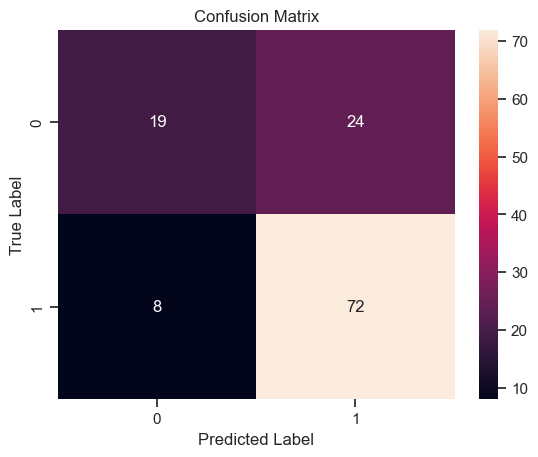

In [134]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()